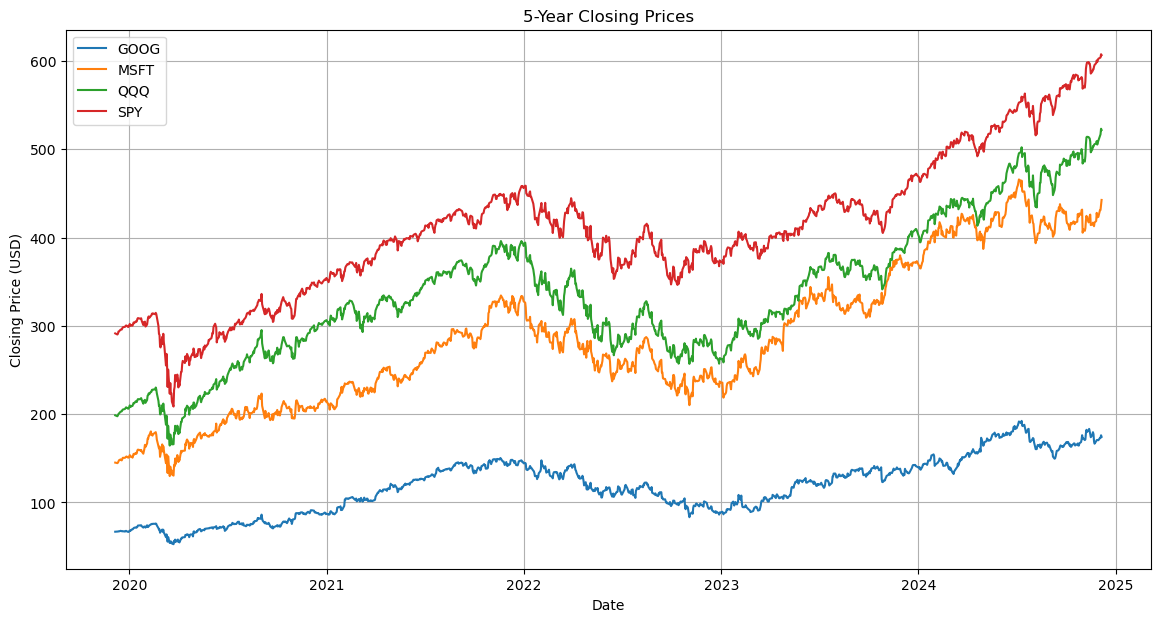

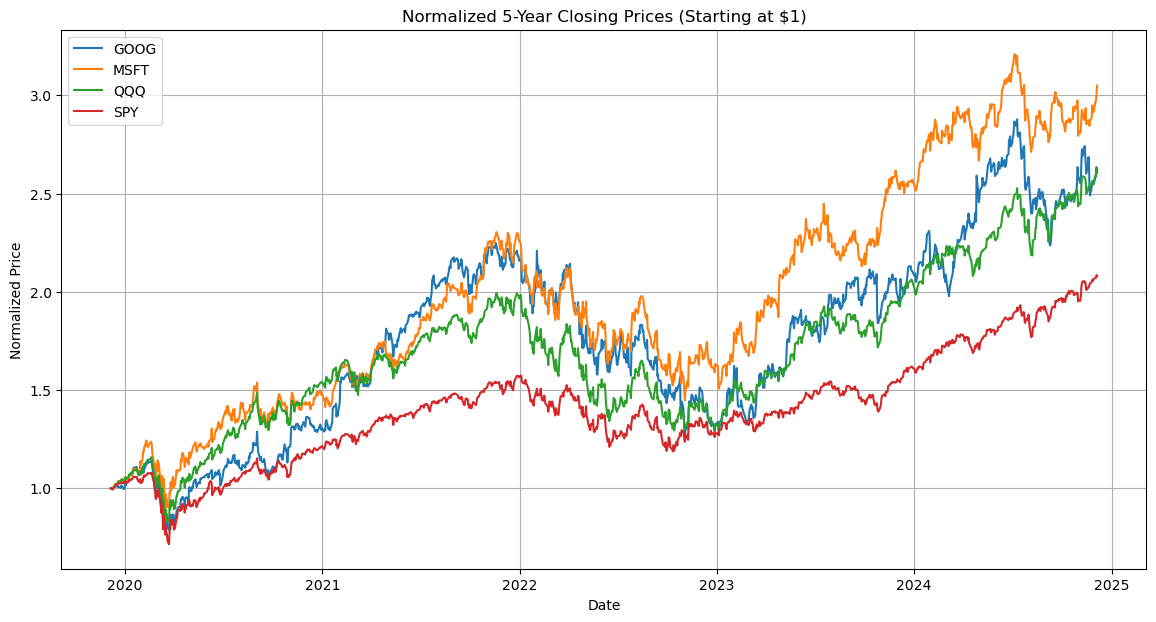

Earnings Per Share (EPS):
GOOG: 7.55
MSFT: 12.13
QQQ: None
SPY: None
  Symbol    EPS
0   GOOG   7.55
1   MSFT  12.13
2    QQQ    NaN
3    SPY    NaN

Price to Earnings (P/E) Ratios:
Calculated P/E Ratios:
GOOG: 23.08741689517798
MSFT: 36.48969456860573
QQQ: None
SPY: None

P/E Ratios from yfinance:
GOOG: 23.087416
MSFT: 36.489693
QQQ: 42.550224
SPY: 30.56018
  Symbol  Calculated P/E Ratio  YFinance P/E Ratio
0   GOOG             23.087417           23.087416
1   MSFT             36.489695           36.489693
2    QQQ                   NaN           42.550224
3    SPY                   NaN           30.560180


In [5]:
##Code to analyze EPS and P/E ratios for GOOG, MSFT, QQQ and SPY

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Define the stock symbols and the period
symbols = ['GOOG', 'MSFT', 'QQQ', 'SPY']
period = '5y'

# Create an empty DataFrame to store the closing prices
data = pd.DataFrame()

# Fetch the closing prices for each stock
for symbol in symbols:
    data[symbol] = yf.Ticker(symbol).history(period=period)['Close']

# Plot the original closing prices
plt.figure(figsize=(14, 7))
for symbol in symbols:
    plt.plot(data.index, data[symbol], label=symbol)

plt.title('5-Year Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Normalize the prices so they all start at $1
normalized_data = data / data.iloc[0] * 1

# Plot the normalized prices
plt.figure(figsize=(14, 7))
for symbol in symbols:
    plt.plot(normalized_data.index, normalized_data[symbol], label=symbol)

plt.title('Normalized 5-Year Closing Prices (Starting at $1)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

# Fetch the EPS for each stock and store it in a dictionary
eps_data = {}
for symbol in symbols:
    ticker_info = yf.Ticker(symbol).info
    if 'trailingEps' in ticker_info:
        eps_data[symbol] = ticker_info['trailingEps']
    else:
        eps_data[symbol] = None  # Handle missing EPS data

# Print the EPS for each stock
print("Earnings Per Share (EPS):")
for symbol, eps in eps_data.items():
    print(f"{symbol}: {eps}")

# If you need to store EPS data in a DataFrame
eps_df = pd.DataFrame(list(eps_data.items()), columns=['Symbol', 'EPS'])
print(eps_df)

# Calculate the Price to EPS (P/E) ratio for stocks with available EPS
pe_ratios_calculated = {symbol: data[symbol].iloc[-1] / eps_data[symbol] if eps_data[symbol] is not None else None for symbol in symbols}

# Fetch P/E ratio from yfinance and compare with calculated values
pe_ratios_yfinance = {symbol: yf.Ticker(symbol).info['trailingPE'] for symbol in symbols}

print("\nPrice to Earnings (P/E) Ratios:")
print("Calculated P/E Ratios:")
for symbol, pe in pe_ratios_calculated.items():
    print(f"{symbol}: {pe}")

print("\nP/E Ratios from yfinance:")
for symbol, pe in pe_ratios_yfinance.items():
    print(f"{symbol}: {pe}")

# Create a DataFrame to compare P/E ratios
pe_comparison_df = pd.DataFrame({
    'Symbol': symbols,
    'Calculated P/E Ratio': [pe_ratios_calculated[symbol] for symbol in symbols],
    'YFinance P/E Ratio': [pe_ratios_yfinance[symbol] for symbol in symbols]
})
print(pe_comparison_df)


